# Libraries

In [1]:
import numpy as np
import pandas as pd
import nltk
#nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package vader_lexicon to C:\Users\Zi
[nltk_data]     Xu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# Data Loading & Cleaning

In [2]:
df = pd.read_csv('reviews.csv')
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,gp:AOqpTOGLtpLGPvPQojtkRAABYTBPxvMutSHBz9jlkxP...,Eileen Lim,https://play-lh.googleusercontent.com/a/AATXAJ...,Need to login to singpass when sign up for fre...,1,0,1.1.82,2021-06-23 21:40:18,NaN,NaN
1,gp:AOqpTOEYo9rKLDIRnK16P49Hz8p-WaVLt3ckP672Jt5...,Earl Shumaker,https://play-lh.googleusercontent.com/a/AATXAJ...,Don't use,1,0,NaN,2021-06-22 11:04:14,NaN,NaN
2,gp:AOqpTOGmIXjrWQrW-7D5HWS4u7wDYrjPZLzYwyIe1fL...,Cheah Seng Kai,https://play-lh.googleusercontent.com/a/AATXAJ...,The page that links to sing pass qr code doesn...,3,7,1.1.82,2021-06-21 21:01:58,NaN,NaN
3,gp:AOqpTOEm2nv8exFMI8OChnw-1kk5OhR84a7XmDZZO1w...,Windo,https://play-lh.googleusercontent.com/a-/AOh14...,Can't login.,1,0,1.1.82,2021-06-21 13:17:47,NaN,NaN
4,gp:AOqpTOGM-PheRm04O1TA0TbiBLDSqK87DKtciewDeW4...,NJ Lumiguen,https://play-lh.googleusercontent.com/a-/AOh14...,I can not run the program. I am using tecno ca...,1,0,1.1.82,2021-06-20 08:04:50,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2147 entries, 0 to 2146
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              2147 non-null   object
 1   userName              2147 non-null   object
 2   userImage             2147 non-null   object
 3   content               2147 non-null   object
 4   score                 2147 non-null   int64 
 5   thumbsUpCount         2147 non-null   int64 
 6   reviewCreatedVersion  1435 non-null   object
 7   at                    2147 non-null   object
 8   replyContent          1094 non-null   object
 9   repliedAt             1094 non-null   object
dtypes: int64(2), object(8)
memory usage: 167.9+ KB


In [4]:
df.dropna(subset=['reviewCreatedVersion'],inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 2146
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              1435 non-null   object
 1   userName              1435 non-null   object
 2   userImage             1435 non-null   object
 3   content               1435 non-null   object
 4   score                 1435 non-null   int64 
 5   thumbsUpCount         1435 non-null   int64 
 6   reviewCreatedVersion  1435 non-null   object
 7   at                    1435 non-null   object
 8   replyContent          730 non-null    object
 9   repliedAt             730 non-null    object
dtypes: int64(2), object(8)
memory usage: 123.3+ KB


In [6]:
df = df[['content','at','score','thumbsUpCount', 'reviewCreatedVersion']]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 2146
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   content               1435 non-null   object
 1   at                    1435 non-null   object
 2   score                 1435 non-null   int64 
 3   thumbsUpCount         1435 non-null   int64 
 4   reviewCreatedVersion  1435 non-null   object
dtypes: int64(2), object(3)
memory usage: 67.3+ KB


# VADER Sentiment Analysis

In [8]:
df

,content,at,score,thumbsUpCount,reviewCreatedVersion
0,Need to login to singpass when sign up for fre...,2021-06-23 21:40:18,1,0,1.1.82
2,The page that links to sing pass qr code doesn...,2021-06-21 21:01:58,3,7,1.1.82
3,Can't login.,2021-06-21 13:17:47,1,0,1.1.82
4,I can not run the program. I am using tecno ca...,2021-06-20 08:04:50,1,0,1.1.82
5,I love this apps,2021-06-20 01:02:40,1,0,1.1.82
...,...,...,...,...,...
2142,Health check section has a bug. If ever you ge...,2020-03-03 23:07:34,1,156,1.0.9
2143,"It isn't working. I wish you are like AXA, sob...",2020-03-03 08:35:40,1,5,1.0.9
2144,The application is super a huge to monitor you...,2020-03-03 08:32:19,5,129,1.0.9
2145,Exceptional!!!,2020-02-17 14:23:22,5,12,1.0.0


In [9]:
df.reset_index(inplace=True)

In [10]:
df

,index,content,at,score,thumbsUpCount,reviewCreatedVersion
0,0,Need to login to singpass when sign up for fre...,2021-06-23 21:40:18,1,0,1.1.82
1,2,The page that links to sing pass qr code doesn...,2021-06-21 21:01:58,3,7,1.1.82
2,3,Can't login.,2021-06-21 13:17:47,1,0,1.1.82
3,4,I can not run the program. I am using tecno ca...,2021-06-20 08:04:50,1,0,1.1.82
4,5,I love this apps,2021-06-20 01:02:40,1,0,1.1.82
...,...,...,...,...,...,...
1430,2142,Health check section has a bug. If ever you ge...,2020-03-03 23:07:34,1,156,1.0.9
1431,2143,"It isn't working. I wish you are like AXA, sob...",2020-03-03 08:35:40,1,5,1.0.9
1432,2144,The application is super a huge to monitor you...,2020-03-03 08:32:19,5,129,1.0.9
1433,2145,Exceptional!!!,2020-02-17 14:23:22,5,12,1.0.0


In [11]:
analyzer = SentimentIntensityAnalyzer()
pos_reviews = ''
neg_reviews = ''
concat_reviews = ''
score_arr = []
for i in range(len(df)):
    sentence = df.content[i]
    concat_reviews += ' %s' % sentence
    vs = analyzer.polarity_scores(sentence)
    if vs.get('compound') >= 0:
        pos_reviews += ' %s' % sentence
    else:
        neg_reviews += ' %s' % sentence
    score_arr.append(vs.get('compound'))
    
scores = np.vstack([df.reviewCreatedVersion,score_arr])
print(str(scores[1][:5]) + ' ...')

[0.2846 -0.5371 0.0 0.0 0.6369] ...


# Sentiment for each version plot

In [12]:
unique_versions = np.unique(scores[0], return_counts=True)[0] # Versions
unique_review_count = np.unique(scores[0], return_counts=True)[1]
sum_arr = []
sum_vers = []
for version in unique_versions:
    version_sum = 0
    count = 0
    for i in range(len(scores[1])):
        if version == scores[0][i]:
            version_sum += scores[1][i]
            count += 1;
            
    sum_arr.append(version_sum / count )#unique_review_count[np.where(unique_versions==version)[0][0]] also works
    sum_vers.append(version)
    
print(sum_vers)
print(sum_arr)

['1.0.0', '1.0.10', '1.0.12', '1.0.13', '1.0.14', '1.0.17', '1.0.21', '1.0.23', '1.0.24', '1.0.26', '1.0.30', '1.0.32', '1.0.36', '1.0.42', '1.0.43', '1.0.64', '1.0.70', '1.0.73', '1.0.78', '1.0.8', '1.0.82', '1.0.88', '1.0.9', '1.0.92', '1.0.96', '1.0.97', '1.1.1', '1.1.10', '1.1.11', '1.1.13', '1.1.14', '1.1.15', '1.1.16', '1.1.20', '1.1.22', '1.1.24', '1.1.27', '1.1.29', '1.1.32', '1.1.33', '1.1.36', '1.1.4', '1.1.40', '1.1.42', '1.1.45', '1.1.49', '1.1.51', '1.1.57', '1.1.58', '1.1.6', '1.1.61', '1.1.65', '1.1.70', '1.1.77', '1.1.80', '1.1.82']
[0.3239, 0.12027777777777778, -0.4767, 0.32282500000000003, 0.20798181818181816, 0.30032187500000007, 0.5614562248995988, 0.4089475, 0.2362625, 0.21399285714285712, 0.0, 0.4215, 0.11091999999999999, 0.13021428571428575, 0.21985294117647058, 0.0, 0.2549941176470588, 0.07044074074074073, 0.09430666666666668, 0.9236, 0.21486666666666668, -0.05977142857142857, 0.38356666666666667, -0.033775, 0.29295, 0.22431666666666664, -0.03075, -0.21075, -0.0

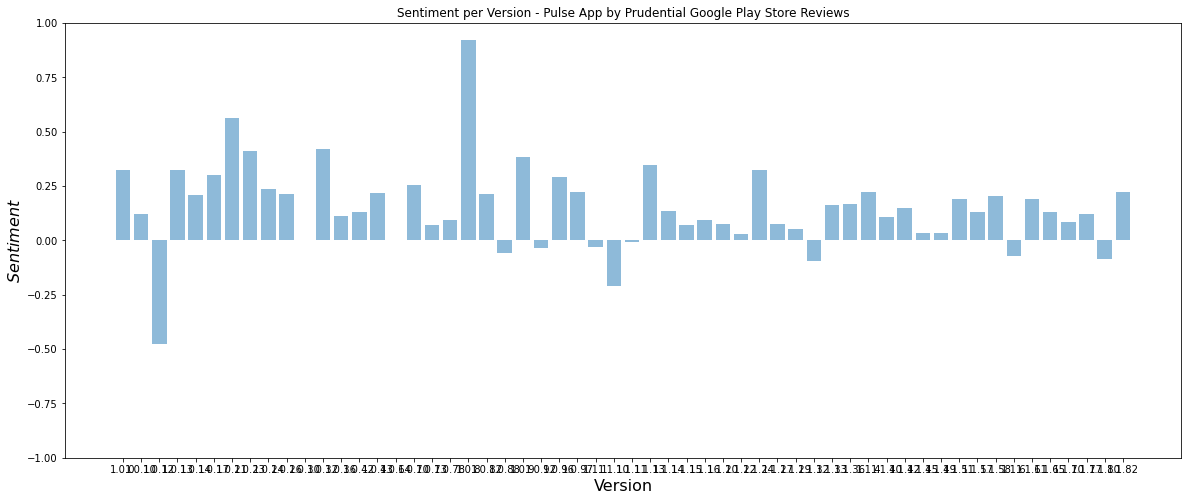

In [13]:
plt.figure(figsize=(20,8))
plt.bar(sum_vers, sum_arr, align='center', alpha=0.5)

plt.xlabel("Version",fontsize=16)
plt.ylabel("$Sentiment$",fontsize=16)
plt.title("Sentiment per Version - Pulse App by Prudential Google Play Store Reviews")
plt.ylim(-1, 1)

plt.show()

# App Version with Negative Review Sentiment

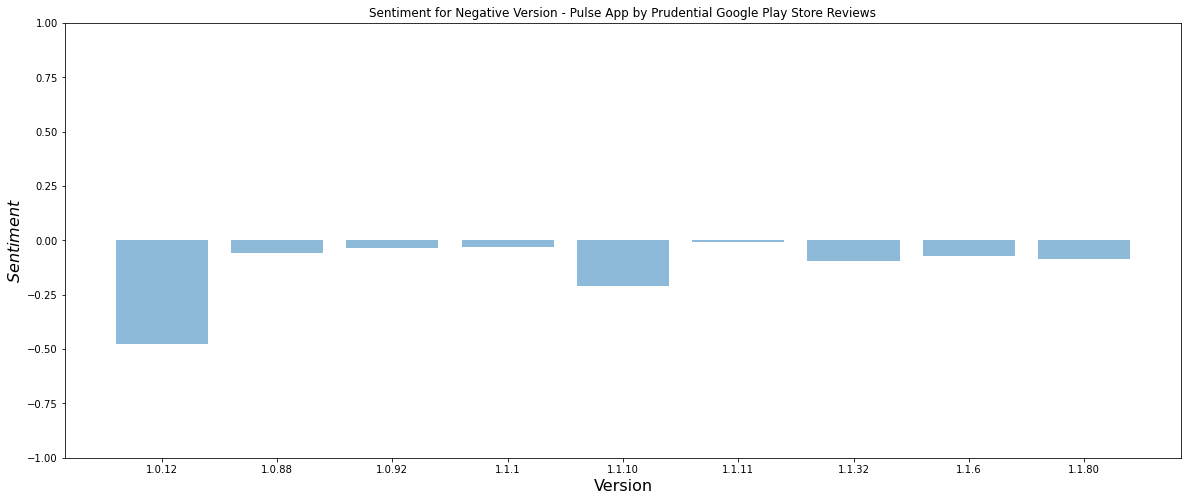

In [14]:
neg_arr = []
neg_vers = []
for i in range(len(sum_arr)):
    if sum_arr[i] < 0:
        neg_arr.append(sum_arr[i])
        neg_vers.append(sum_vers[i])

plt.figure(figsize=(20,8))
plt.bar(neg_vers, neg_arr, align='center', alpha=0.5)

plt.xlabel("Version",fontsize=16)
plt.ylabel("$Sentiment$",fontsize=16)
plt.title("Sentiment for Negative Version - Pulse App by Prudential Google Play Store Reviews")
plt.ylim(-1, 1)

plt.show()

In [15]:
sentiment = df['content'].apply(lambda x: analyzer.polarity_scores(x))
df = pd.concat([df,sentiment.apply(pd.Series)],1)

In [16]:
df['comp_score'] = df['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')  #pos = positive, neg = negative

In [17]:
df.describe()

,index,score,thumbsUpCount,neg,neu,pos,compound
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,1094.280836,3.411847,22.793031,0.057435,0.632325,0.306760,0.228056
std,636.985070,1.819160,90.253523,0.148454,0.348649,0.358877,0.428002
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-0.931400
25%,520.500000,1.000000,0.000000,0.000000,0.365500,0.000000,0.000000
50%,1098.000000,5.000000,1.000000,0.000000,0.714000,0.137000,0.273200
75%,1701.000000,5.000000,6.000000,0.000000,1.000000,0.592000,0.571900
max,2146.000000,5.000000,1229.000000,1.000000,1.000000,1.000000,0.985800


# Distribution of Positive & Negative Reviews

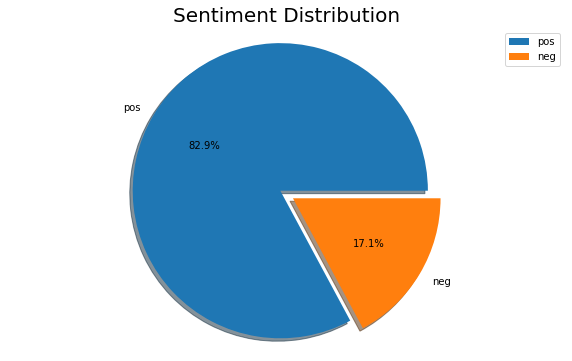

In [18]:
compScore = df.comp_score.value_counts()

plt.figure(figsize=(10,6))
plt.title("Sentiment Distribution", fontsize=20)
plt.pie(compScore, explode=(0.1,0), labels=compScore.index, autopct='%1.1f%%', shadow=True)
plt.legend()
plt.axis('equal')

plt.show()

# Word Cloud

## Negative Reviews

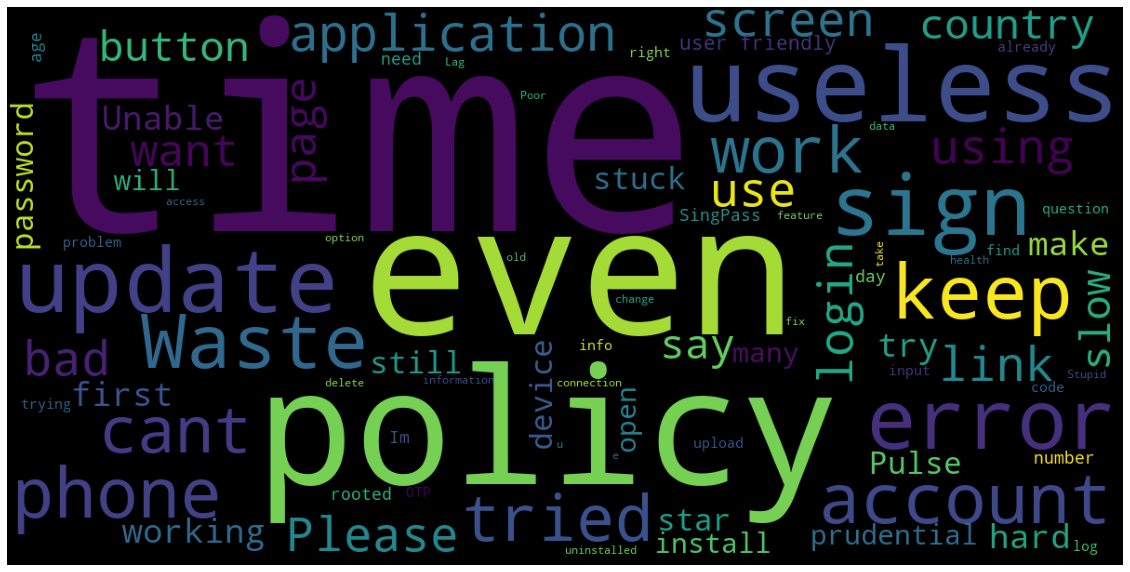

In [19]:
stopwords = set(STOPWORDS)
stopwords.add('app')
stopwords.add('apps')

def generate_wordcloud(text): 
    wordcloud = WordCloud(relative_scaling = 1.0,
                          scale=3,
                          stopwords = stopwords
                          ).generate(text)
    plt.figure(figsize=(20,20))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

generate_wordcloud(neg_reviews)

## Positive Reviews

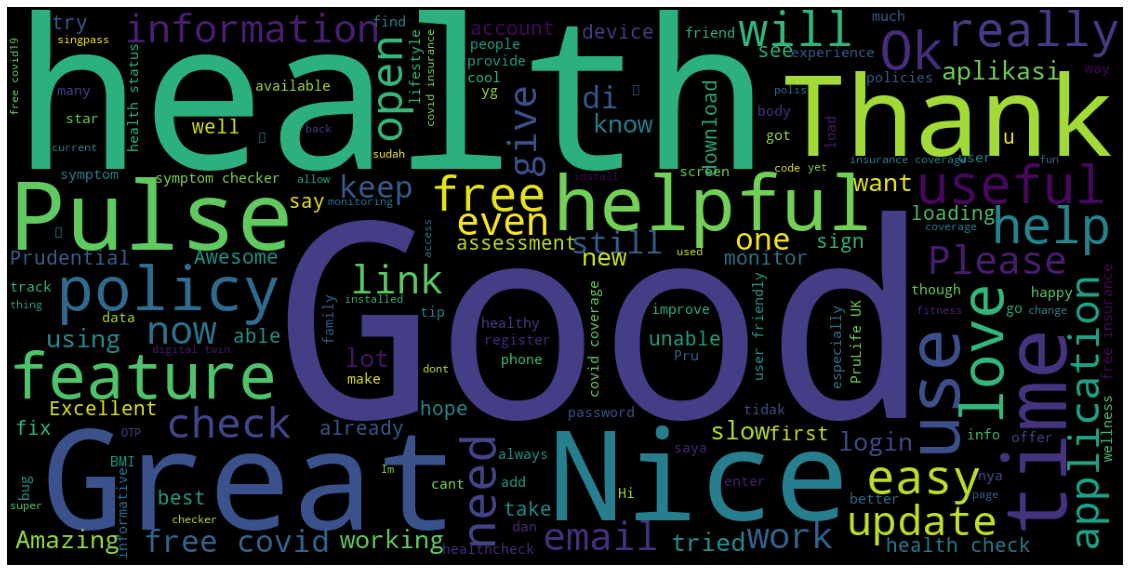

In [20]:
generate_wordcloud(pos_reviews)

## Filtered Negative Reviews

In [21]:
filtered_df = df.loc[(df['thumbsUpCount']>=20) & (df['comp_score']=='neg')]
filtered_df.reset_index(inplace=True)

In [22]:
filtered_reviews = ''
for i in range(len(filtered_df)):
    sentence = filtered_df.content[i]
    filtered_reviews += ' %s' % sentence

In [23]:
print(filtered_reviews)

 Terrible bug at at QR page of mandatory SingPass key login. I was stuck for 2 weeks and this was not resolved. It should really be a P0 matter since it directly affects customers. Lifestyle and activity tips can be found in health apps. I thought this app is designed for us to get a better grasp of our insurance policy status and details. Stop right there. Pulse is not helpful at all when you want access to your PRU policies. I can't log in the app even though I've tried all day long. The lig in screen keeps freezing. It's so annoying. Hey, why suddenly i cant access the app with error message: application blocked, run on jailbroken or rooted device. I've been using this app on this phone and was run ok before. My phone never rooted till today, and others banking apps still working good. Whats wrong with your device detection system? As suggested, downloaded root checker and the status of my device is not rooted. Please re check your app. I want to link my policy, but I can't receive 

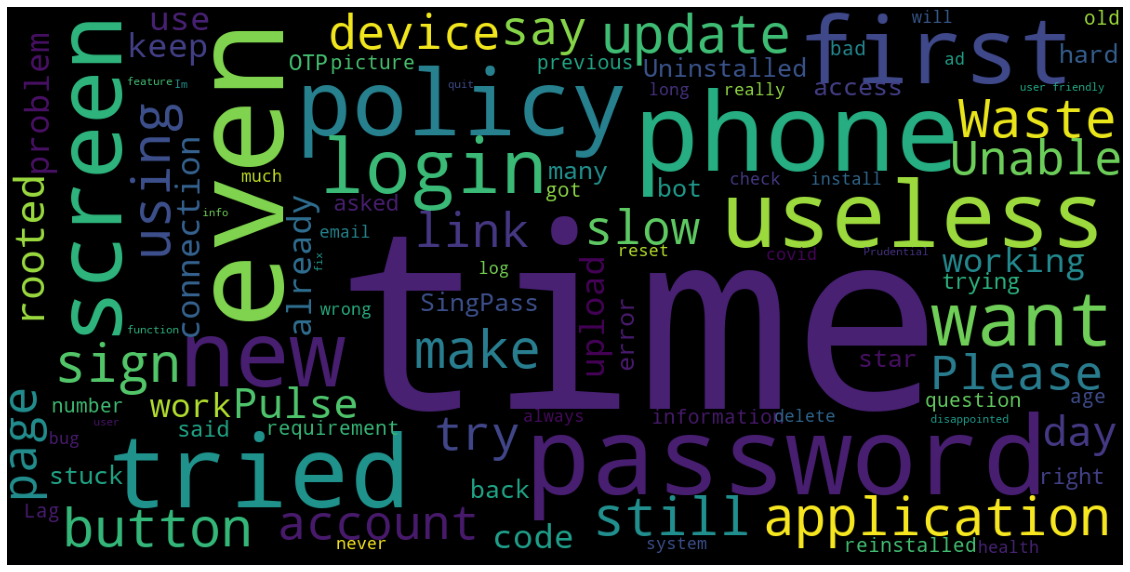

In [24]:
generate_wordcloud(filtered_reviews)